In [1]:
pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install pyodbc

Note: you may need to restart the kernel to use updated packages.


In [101]:
import sqlalchemy
sqlalchemy.__version__

'2.0.30'

In [151]:
import sqlalchemy as db
engine = db.create_engine("sqlite:///D:/_DA+DS/03_Python/sqlalchemy-etl-project/european_database.sqlite")
conn = engine.connect()
print(engine)
print(conn)

Engine(sqlite:///D:/_DA+DS/03_Python/sqlalchemy-etl-project/european_database.sqlite)


In [153]:
inspector = sqlalchemy.inspect(engine)
table_names = inspector.get_table_names()
table_names

['Student', 'divisions', 'matchs']

In [155]:
#accessing the table
metadata = db.MetaData() #extracting the metadata
division= db.Table('divisions', metadata, autoload_with=engine) #Table object

In [157]:
print(repr(metadata.tables['divisions']))

Table('divisions', MetaData(), Column('division', TEXT(), table=<divisions>), Column('name', TEXT(), table=<divisions>), Column('country', TEXT(), table=<divisions>), schema=None)


In [159]:
print(division.columns.keys()) #print column names

['division', 'name', 'country']


In [165]:
#simple sql query
query = division.select()
print(query)

SELECT divisions.division, divisions.name, divisions.country 
FROM divisions


In [167]:
exe = conn.execute(query)
result = exe.fetchall()
print(result)

[('B1', 'Division 1A', 'Belgium'), ('D1', 'Bundesliga', 'Deutschland'), ('D2', '2. Bundesliga', 'Deutschland'), ('E0', 'Premier League', 'England'), ('E1', 'EFL Championship', 'England'), ('E2', 'EFL League One', 'England'), ('E3', 'EFL League Two', 'England'), ('EC', 'National League', 'England'), ('F1', 'Ligue 1', 'France'), ('F2', 'Ligue 2', 'France'), ('G1', 'Superleague', 'Greece'), ('I1', 'Seria A', 'Italy'), ('I2', 'Seria B', 'Italy'), ('N1', 'Eredivisie', 'Netherlands'), ('P1', 'Liga NOS', 'Portugal'), ('SC0', 'Scottish Premiership', 'Scotland'), ('SC1', 'Scottish Championship', 'Scotland'), ('SC2', 'Scottish League One', 'Scotland'), ('SP1', 'LaLiga', 'Spain'), ('SP2', 'LaLiga 2', 'Spain'), ('T1', 'Süper Lig', 'Turkey')]


In [169]:
#creating a new table
Student = db.Table('Student', metadata,
                   db.Column('Id', db.Integer(), primary_key=True),
                   db.Column('Name', db.String(255), nullable=False),
                   db.Column('Major', db.String(255), default="Math"),
                   db.Column('Pass', db.Boolean(), default=True),
                   extend_existing=True
                  )
metadata.create_all(engine)                   

In [171]:
#insert a new row
query = db.insert(Student).values(Id=1, Name='Matthew', Major="English", Pass=True)
print(query)

INSERT INTO "Student" ("Id", "Name", "Major", "Pass") VALUES (:Id, :Name, :Major, :Pass)


In [173]:
conn.execute(query)

OperationalError: (sqlite3.OperationalError) database is locked
[SQL: INSERT INTO "Student" ("Id", "Name", "Major", "Pass") VALUES (?, ?, ?, ?)]
[parameters: (1, 'Matthew', 'English', 1)]
(Background on this error at: https://sqlalche.me/e/20/e3q8)

In [ ]:
print(conn.execute(Student.select()).fetchall())

In [ ]:
values_list = [{'Id':'7', 'Name':'Nisha', 'Major':"Science", 'Pass':False},
              {'Id':'8', 'Name':'Natasha', 'Major':"Math", 'Pass':True},
              {'Id':'9', 'Name':'Ben', 'Major':"English", 'Pass':False}]
query = db.insert(Student)
conn.execute(query,values_list)
print(query)

In [ ]:
print(conn.execute(Student.select()).fetchall())

In [ ]:
from sqlalchemy import text as text
query = text("SELECT * FROM Student")
result = conn.execute(query).fetchall()
print(result)

In [63]:
query = text("SELECT Name, Major FROM Student WHERE Pass != True")
result = conn.execute(query).fetchall()
print(result)

[('Nisha', 'Science'), ('Ben', 'English'), ('Nisha', 'Science'), ('Ben', 'English')]


In [161]:
query = Student.select().where(Student.columns.Major == 'English')
output = conn.execute(query)
print(output.fetchall())

[]


In [163]:
query = Student.select().where(db.and_(Student.columns.Major == 'English', Student.columns.Pass != True))
output = conn.execute(query).fetchall()
print(output)

[]


In [143]:
query = Student.select().where(Student.c.Major.in_(['English','Math']))
output = conn.execute(query)
results = output.fetchall()

In [145]:
import pandas as pd
rows = results
columns = output.keys()
data = pd.DataFrame(rows, columns=columns)
data

,Id,Name,Major,Pass


In [147]:
data = pd.DataFrame(results)
data.columns = output.keys()
data

ValueError: Length mismatch: Expected axis has 0 elements, new values have 4 elements

In [179]:
exe.close()
print(exe)
print(conn)

In [181]:
engine = db.create_engine("sqlite:///D:/_DA+DS/03_Python/sqlalchemy-etl-project/european_database.sqlite")
conn = engine.connect()
metadata = db.MetaData()

In [183]:
inspector = sqlalchemy.inspect(engine)
table_names = inspector.get_table_names()
table_names

['Student', 'divisions', 'matchs']

In [185]:
division = db.Table('divisions', metadata, autoload_with=engine)
match = db.Table('matchs', metadata, autoload_with=engine)
print(division.columns.keys())
print(match.columns.keys())

['division', 'name', 'country']
['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'season']


In [189]:
from sqlalchemy import select, and_

# Use select without the list brackets, and use `select_from` for explicit joins
query = (
    select(division, match)  # Select both tables
    .select_from(division.join(match, division.c.division == match.c.Div))  # Use `c` to refer to columns
    .where(and_(division.c.division == "E1", match.c.season == 2009))  # Use `and_` for multiple conditions
    .order_by(match.columns.HomeTeam)
)


In [195]:
output = conn.execute(query)
results = output.fetchall()
print(results)

[('E1', 'EFL Championship', 'England', 'E1', datetime.date(2008, 8, 16), 'Barnsley', 'Coventry', 1.0, 2.0, 'A', 2009), ('E1', 'EFL Championship', 'England', 'E1', datetime.date(2008, 8, 30), 'Barnsley', 'Derby', 2.0, 0.0, 'H', 2009), ('E1', 'EFL Championship', 'England', 'E1', datetime.date(2008, 9, 16), 'Barnsley', 'Cardiff', 0.0, 1.0, 'A', 2009), ('E1', 'EFL Championship', 'England', 'E1', datetime.date(2008, 9, 27), 'Barnsley', 'Norwich', 0.0, 0.0, 'D', 2009), ('E1', 'EFL Championship', 'England', 'E1', datetime.date(2008, 10, 4), 'Barnsley', 'Doncaster', 4.0, 1.0, 'H', 2009), ('E1', 'EFL Championship', 'England', 'E1', datetime.date(2008, 10, 21), 'Barnsley', 'Sheffield Weds', 2.0, 1.0, 'H', 2009), ('E1', 'EFL Championship', 'England', 'E1', datetime.date(2008, 10, 25), 'Barnsley', 'Bristol City', 0.0, 0.0, 'D', 2009), ('E1', 'EFL Championship', 'England', 'E1', datetime.date(2008, 11, 8), 'Barnsley', 'Sheffield United', 1.0, 2.0, 'A', 2009), ('E1', 'EFL Championship', 'England', '

In [201]:
data = pd.DataFrame(results)
data.columns = output.keys()
data

,division,name,country,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,season
0,E1,EFL Championship,England,E1,2008-08-16,Barnsley,Coventry,1.0,2.0,A,2009
1,E1,EFL Championship,England,E1,2008-08-30,Barnsley,Derby,2.0,0.0,H,2009
2,E1,EFL Championship,England,E1,2008-09-16,Barnsley,Cardiff,0.0,1.0,A,2009
3,E1,EFL Championship,England,E1,2008-09-27,Barnsley,Norwich,0.0,0.0,D,2009
4,E1,EFL Championship,England,E1,2008-10-04,Barnsley,Doncaster,4.0,1.0,H,2009
...,...,...,...,...,...,...,...,...,...,...,...
547,E1,EFL Championship,England,E1,2009-03-10,Wolves,Ipswich,0.0,0.0,D,2009
548,E1,EFL Championship,England,E1,2009-03-14,Wolves,Charlton,2.0,1.0,H,2009
549,E1,EFL Championship,England,E1,2009-04-10,Wolves,Southampton,3.0,0.0,H,2009
550,E1,EFL Championship,England,E1,2009-04-18,Wolves,QPR,1.0,0.0,H,2009


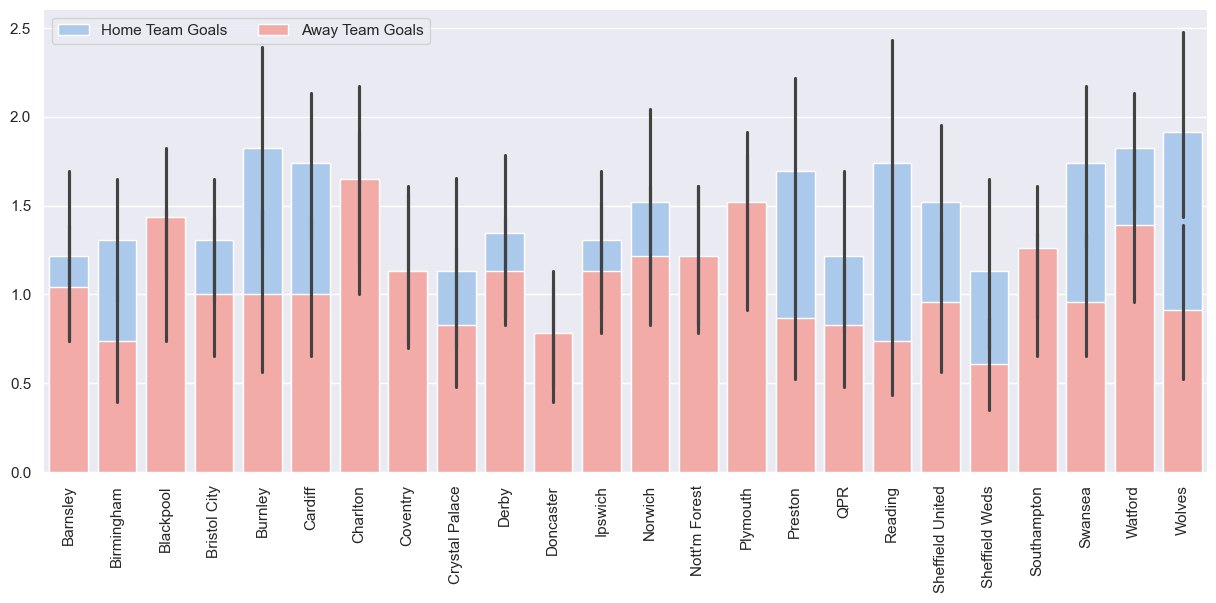

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation=90)
sns.set_color_codes("pastel")
sns.barplot(x="HomeTeam", y="FTHG", data=data,
            label="Home Team Goals", color="b")

sns.barplot(x="HomeTeam", y="FTAG", data=data,
            label="Away Team Goals", color="r")
ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set(ylabel="", xlabel="")
sns.despine(left=True, bottom=True)

In [225]:
query = text("SELECT * FROM matchs WHERE HomeTeam LIKE 'Norwich'")
output = conn.execute(query)
results = output.fetchall()

data = pd.DataFrame(results)
data.columns = output.keys()

In [227]:
data.to_csv("SQL_result.csv",index=False)

In [231]:
engine = db.create_engine("sqlite:///D:/_DA+DS/03_Python/sqlalchemy-etl-project/european_database2.sqlite")
conn = engine.connect()
metadata = db.MetaData()
inspector = sqlalchemy.inspect(engine)
table_names = inspector.get_table_names()
table_names

['divisions', 'matchs']

In [245]:
df = pd.read_csv('SQL_result.csv')
data_top = data.head()   
# display 
data_top 

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,season
0,E1,2020-09-19,Norwich,Preston,2.0,2.0,D,2021
1,E1,2020-10-03,Norwich,Derby,0.0,1.0,A,2021
2,E1,2020-10-20,Norwich,Birmingham,1.0,0.0,H,2021
3,E1,2020-10-24,Norwich,Wycombe,2.0,1.0,H,2021
4,E1,2020-11-03,Norwich,Millwall,0.0,0.0,D,2021


In [247]:
df.to_sql(con=engine, name="SQL_Results", if_exists='replace', index=False)

348

In [251]:
conn = engine.connect()
metadata = db.MetaData()
data = db.Table('SQL_Results', metadata, autoload_with=engine)

In [265]:
query = data.select()
exe = conn.execute(query)
result = exe.fetchmany(10)
for r in result:
    print(r)

('E1', '2020-09-19', 'Norwich', 'Preston', 2.0, 2.0, 'D', 2021)
('E1', '2020-10-03', 'Norwich', 'Derby', 0.0, 1.0, 'A', 2021)
('E1', '2020-10-20', 'Norwich', 'Birmingham', 1.0, 0.0, 'H', 2021)
('E1', '2020-10-24', 'Norwich', 'Wycombe', 2.0, 1.0, 'H', 2021)
('E1', '2020-11-03', 'Norwich', 'Millwall', 0.0, 0.0, 'D', 2021)
('E1', '2020-11-07', 'Norwich', 'Swansea', 1.0, 0.0, 'H', 2021)
('E1', '2020-11-28', 'Norwich', 'Coventry', 1.0, 1.0, 'D', 2021)
('E1', '2020-12-05', 'Norwich', 'Sheffield Weds', 2.0, 1.0, 'H', 2021)
('E1', '2020-12-09', 'Norwich', "Nott'm Forest", 2.0, 1.0, 'H', 2021)
('E1', '2020-12-19', 'Norwich', 'Cardiff', 2.0, 0.0, 'H', 2021)


In [269]:
inspector = sqlalchemy.inspect(engine)
table_names = inspector.get_table_names()
table_names

['SQL_Results', 'divisions', 'matchs']

In [273]:
conn.close()